In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
import tensorflow as tf # Import TensorFlow library
import tensorflow_datasets as tfds # Import TensorFlow Datasets for accessing datasets

# Load the MNIST dataset
mnist_dataset = tfds.load('mnist')

# Access the training and testing splits
train_data, test_data = mnist_dataset['train'], mnist_dataset['test']

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
import pandas as pd

# Load the Iris dataset from UCI Machine Learning Repository
iris_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d uciml/iris # Replace with the dataset's Kaggle path

Dataset URL: https://www.kaggle.com/datasets/uciml/iris
License(s): CC0-1.0
  0% 0.00/3.60k [00:00<?, ?B/s]
100% 3.60k/3.60k [00:00<00:00, 5.85MB/s]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris_data = pd.read_csv(url, names=column_names)

# Preprocessing
X = iris_data.drop('class', axis=1)  # Features
y = iris_data['class']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% for training, 20% for testing

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training and Evaluation
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results[model_name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),  # Weighted average for multiclass
        'Recall': recall_score(y_test, y_pred, average='weighted'),  # Weighted average for multiclass
        'F1-score': f1_score(y_test, y_pred, average='weighted')  # Weighted average for multiclass
    }

# Print the results
for model_name, metrics in results.items():
    print(f"--- {model_name} ---")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")
    print("\n")

--- Logistic Regression ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


--- Decision Tree ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


--- Random Forest ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


--- Support Vector Machine ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0




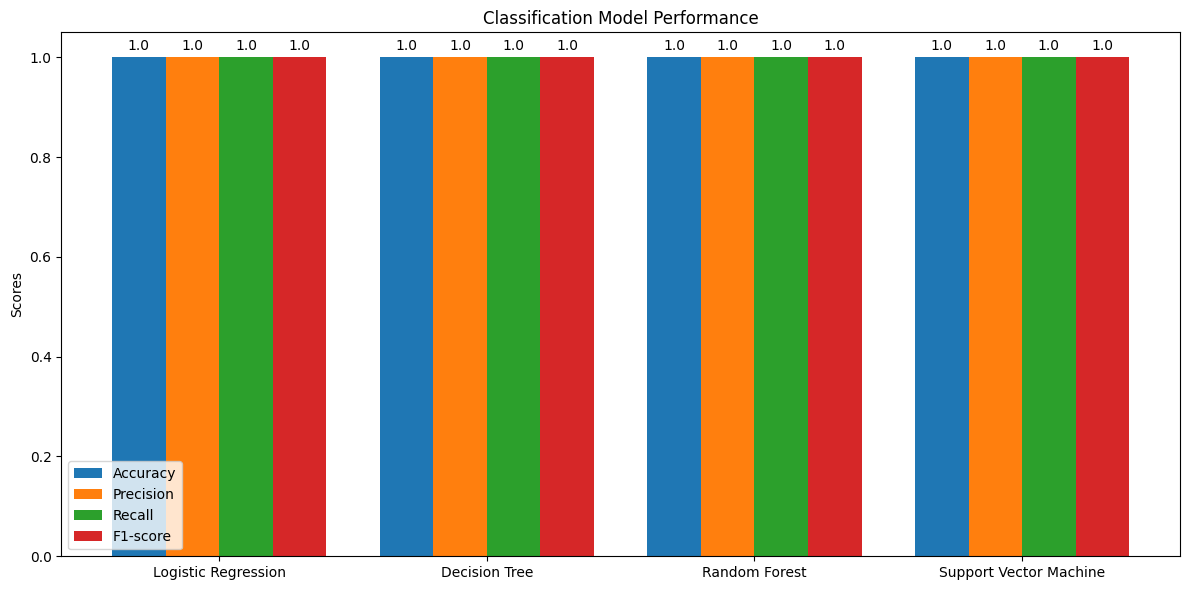

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract model names and metrics from the results dictionary
model_names = list(results.keys())
accuracy = [results[model]['Accuracy'] for model in model_names]
precision = [results[model]['Precision'] for model in model_names]
recall = [results[model]['Recall'] for model in model_names]
f1_score = [results[model]['F1-score'] for model in model_names]

# Set up the bar chart
x = np.arange(len(model_names))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width*1.5, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - width/2, precision, width, label='Precision')
rects3 = ax.bar(x + width/2, recall, width, label='Recall')
rects4 = ax.bar(x + width*1.5, f1_score, width, label='F1-score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Classification Model Performance')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

# Add value labels to the bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 3)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()
plt.show()